In [109]:
#Importing the libraries required
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

from glob import glob
import matplotlib.pyplot as plt

In [110]:
import PIL

In [111]:
#setting the Train dataset and test dataset path in the folder
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [112]:
#Setting the image size of all the input images supported for Resnet50 model
IMAGE_SIZE = [224, 224]

In [113]:
'''Importing the resnet model We do not include the top, 
because that is what we want to train ourselves. 
We only load convolutional weights that are trained on ImageNet data. 
After loading the model the layers are set “not trainable”, thus frozen.'''
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [114]:
resnet

In [115]:
for layer in resnet.layers:
    layer.trainable = False

In [116]:
#Getting the number of Output classes
folders = glob('Datasets/Train/*')

In [159]:
print(folders)

['Datasets/Train/mercedes', 'Datasets/Train/audi', 'Datasets/Train/lamborghini']


In [118]:
#Flattening the layers
x = Flatten()(resnet.output)

In [119]:
prediction = Dense(len(folders), activation='softmax')(x)

In [120]:
#Model creation  .Taking the resnet input shape and output as required to classify into 4 classes instead of 1000.
model = Model(inputs=resnet.input, outputs=prediction)

In [121]:
#Summary of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [122]:
#Compiling the model with cost and optimization method and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [123]:
#Using the ImageDataGenerator for data augmentation process in training images only (Not testing )
#Scaling of training and testing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [124]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 141 images belonging to 3 classes.


In [125]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 79 images belonging to 3 classes.


In [126]:
#Fitting the model 
with tf.device('/GPU:0'):
  r = model.fit(
      training_set,
      validation_data=test_set,
      epochs=50,
      steps_per_epoch=len(training_set),
      validation_steps=len(test_set)
    )

Epoch 1/50


2023-06-05 20:57:15.480153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - ETA: 0s - loss: 6.5019 - accuracy: 0.4043

2023-06-05 20:57:27.026039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 17s 3s/step - loss: 6.5019 - accuracy: 0.4043 - val_loss: 8.8362 - val_accuracy: 0.3797
Epoch 2/50
5/5 [==============================] - 13s 3s/step - loss: 7.1434 - accuracy: 0.4894 - val_loss: 4.6785 - val_accuracy: 0.5063
Epoch 3/50
5/5 [==============================] - 13s 3s/step - loss: 4.6785 - accuracy: 0.2979 - val_loss: 1.8345 - val_accuracy: 0.4430
Epoch 4/50
5/5 [==============================] - 14s 3s/step - loss: 2.7137 - accuracy: 0.5532 - val_loss: 3.0824 - val_accuracy: 0.5443
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 2.6048 - accuracy: 0.5957 - val_loss: 1.3175 - val_accuracy: 0.5696
Epoch 6/50
5/5 [==============================] - 17s 4s/step - loss: 1.1224 - accuracy: 0.5887 - val_loss: 1.2599 - val_accuracy: 0.4810
Epoch 7/50
5/5 [==============================] - 17s 3s/step - loss: 1.0584 - accuracy: 0.6525 - val_loss: 1.2471 - val_accuracy: 0.5443
Epoch 8/50
5/5 [=============================

In [127]:
tf.test.is_built_with_cuda()

True

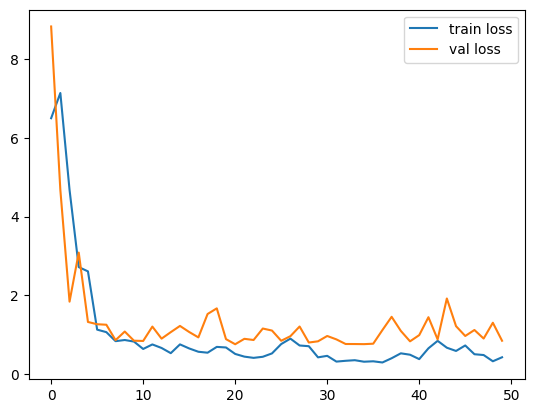

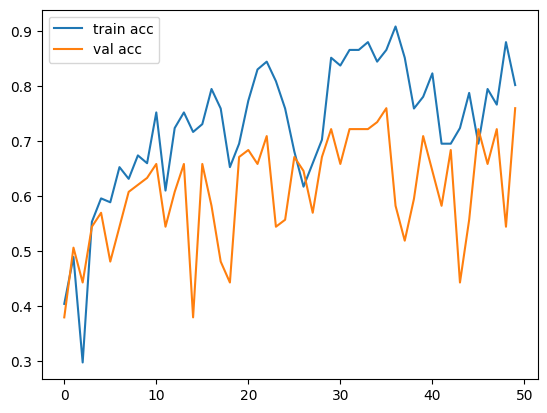

<Figure size 640x480 with 0 Axes>

In [128]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [129]:
import tensorflow as tf


In [130]:
tf.test.is_built_with_cuda()


True

In [131]:
tf.config.list_physical_devices(
    device_type=None
)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [132]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))


Num GPUs: 0


In [133]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [134]:
y_pred = model.predict(test_set)

2023-06-05 21:08:15.042260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 5s 1s/step


In [135]:
y_pred


array([[3.97614837e-02, 3.48644793e-01, 6.11593723e-01],
       [9.83921766e-01, 8.06700671e-04, 1.52715174e-02],
       [9.23388451e-03, 7.70300569e-04, 9.89995837e-01],
       [4.32104692e-02, 8.65701139e-02, 8.70219469e-01],
       [6.27548294e-03, 3.40173021e-02, 9.59707141e-01],
       [5.25443429e-05, 5.39840162e-02, 9.45963383e-01],
       [1.84860565e-02, 5.97329080e-01, 3.84184897e-01],
       [2.31273390e-07, 9.76737136e-10, 9.99999702e-01],
       [5.57247037e-03, 1.73439216e-02, 9.77083564e-01],
       [2.02803910e-02, 7.46939957e-01, 2.32779637e-01],
       [1.63835517e-04, 9.64358211e-01, 3.54779214e-02],
       [1.36954367e-01, 8.15855026e-01, 4.71905395e-02],
       [6.51204064e-02, 2.09917352e-01, 7.24962234e-01],
       [1.73673466e-01, 1.41265824e-01, 6.85060740e-01],
       [7.43834767e-03, 7.67244279e-01, 2.25317433e-01],
       [8.01531691e-03, 9.69680488e-01, 2.23040003e-02],
       [9.22788575e-04, 8.44558418e-01, 1.54518709e-01],
       [2.13709965e-01, 6.52090

In [136]:
print(y_pred.shape)

(79, 3)


In [137]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [171]:
y_pred

array([2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2])

In [139]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [140]:
model=load_model('model_resnet50.h5')

In [172]:
img=image.load_img('Datasets/Test/lamborghini/1.jpg',target_size=(224,224))


In [173]:
x=image.img_to_array(img)
x

array([[[ 70.,  75.,  81.],
        [ 48.,  53.,  59.],
        [135., 140., 144.],
        ...,
        [ 75.,  70.,  67.],
        [ 88.,  79.,  80.],
        [ 94.,  85.,  86.]],

       [[  2.,   7.,  13.],
        [  1.,   6.,  10.],
        [ 11.,  16.,  20.],
        ...,
        [ 71.,  66.,  63.],
        [ 87.,  78.,  79.],
        [ 89.,  80.,  81.]],

       [[ 34.,  39.,  43.],
        [ 68.,  73.,  77.],
        [ 16.,  21.,  24.],
        ...,
        [105., 100.,  97.],
        [ 72.,  63.,  64.],
        [ 75.,  66.,  67.]],

       ...,

       [[ 34.,  33.,  39.],
        [ 35.,  34.,  40.],
        [ 43.,  42.,  48.],
        ...,
        [200., 199., 205.],
        [144., 145., 150.],
        [123., 124., 129.]],

       [[ 32.,  31.,  37.],
        [ 34.,  33.,  39.],
        [ 44.,  43.,  49.],
        ...,
        [210., 209., 215.],
        [226., 227., 232.],
        [210., 211., 216.]],

       [[ 33.,  32.,  38.],
        [ 35.,  34.,  40.],
        [ 43.,  

In [174]:
x.shape


(224, 224, 3)

In [175]:
x=x/255


In [176]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [177]:
model.predict(img_data)

1/1 [==============================] - 0s 105ms/step


array([[3.1936853e-04, 4.6868697e-01, 5.3099364e-01]], dtype=float32)

In [178]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 105ms/step


In [180]:
a==2

array([ True])